# Import data from PgAdmin

In [1]:
# SQLAlchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect
# Pandas
import pandas as pd
from config_file import password 
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

In [2]:
import psycopg2

## Grab Merged table (CPI and Gas prices) for Model 1 and Model 2
Model 1 : Random Forest regressor/ Model 2: Linear regression

In [3]:
# Create connection between PgAdmin and Jupyter Notebook
conn = psycopg2.connect(user="postgres",
                       password=password,
                       host="localhost",
                       port="5432",
                       database="FinalProject")

In [4]:
# Select the table from PgAdmin
cursor = conn.cursor()
postgreSQL_select_Query = "select * from food_cpi_match_join"

cursor.execute(postgreSQL_select_Query)

In [5]:
cpi_gas_df=cursor.fetchall()

In [6]:
cpi_gas_df = pd.read_sql("select * from food_cpi_match_join",conn)

In [7]:
cpi_gas_df.head(5)

,CPI,date,all_grades_all_formulation,all_grades_conventional,all_grades_refomulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
0,147.0,1995-01-01,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,147.7,1995-02-01,1.124,1.103,1.218,1.076,1.062,1.159,1.169,1.157,1.288,1.270,1.250,1.368,1.086
2,147.1,1995-03-01,1.123,1.103,1.209,1.076,1.063,1.149,1.167,1.157,1.275,1.263,1.244,1.358,1.089
3,148.7,1995-04-01,1.133,1.116,1.198,1.087,1.077,1.140,1.174,1.167,1.266,1.270,1.255,1.350,1.094
4,148.7,1995-05-01,1.194,1.181,1.242,1.148,1.141,1.188,1.236,1.234,1.305,1.332,1.323,1.389,1.119


## Grab CPI table for Model 3
Model 3 : Exponential Smoothing

In [8]:
postgreSQL_select_Query = "select * from food_cpi_match"

cursor.execute(postgreSQL_select_Query)

In [9]:
cpi_df=cursor.fetchall()

In [10]:
cpi_df = pd.read_sql("select * from food_cpi_match",conn)
cpi_df.head(5)

,date,CPI
0,1995-01-01,147.0
1,1995-02-01,147.7
2,1995-03-01,147.1
3,1995-04-01,148.7
4,1995-05-01,148.7


In [11]:
cpi_df=cpi_df.rename(columns={"date":"Date"})


In [12]:
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    313 non-null    object 
 1   CPI     313 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [13]:
cpi_df["Date"]=pd.to_datetime(cpi_df["Date"])

In [14]:
cpi_df

,Date,CPI
0,1995-01-01,147.000
1,1995-02-01,147.700
2,1995-03-01,147.100
3,1995-04-01,148.700
4,1995-05-01,148.700
...,...,...
308,2020-09-01,251.303
309,2020-10-01,251.478
310,2020-11-01,251.241
311,2020-12-01,252.009


In [15]:
# Set Date as index 
cpi_df.set_index("Date")

,CPI
Date,
1995-01-01,147.000
1995-02-01,147.700
1995-03-01,147.100
1995-04-01,148.700
1995-05-01,148.700
...,...
2020-09-01,251.303
2020-10-01,251.478
2020-11-01,251.241


In [16]:
# Get first date from the dataframe
cpi_gas_df.head(1)

,CPI,date,all_grades_all_formulation,all_grades_conventional,all_grades_refomulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
0,147.0,1995-01-01,1.127,1.104,1.231,1.079,1.063,1.167,1.17,1.159,1.298,1.272,1.25,1.386,1.104


In [17]:
# # Get last date from the dataframe
cpi_gas_df.tail(1)

,CPI,date,all_grades_all_formulation,all_grades_conventional,all_grades_refomulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
312,252.27,2021-01-01,2.336,2.227,2.549,2.249,2.16,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.64


In [18]:
cpi_gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CPI                         313 non-null    float64
 1   date                        313 non-null    object 
 2   all_grades_all_formulation  313 non-null    float64
 3   all_grades_conventional     313 non-null    float64
 4   all_grades_refomulated      313 non-null    float64
 5   regular_all_formulation     313 non-null    float64
 6   regular_conventional        313 non-null    float64
 7   regular_reformulated        313 non-null    float64
 8   midgrade_all_formulation    313 non-null    float64
 9   midgrade_conventional       313 non-null    float64
 10  midgrade_reformulated       313 non-null    float64
 11  premium_all_formulation     313 non-null    float64
 12  premium_conventional        313 non-null    float64
 13  premium_reformulated        313 non

In [19]:
# Change the column nae
cpi_gas_df=cpi_gas_df.rename(columns={"date":"Date"})

In [20]:
cpi_gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CPI                         313 non-null    float64
 1   Date                        313 non-null    object 
 2   all_grades_all_formulation  313 non-null    float64
 3   all_grades_conventional     313 non-null    float64
 4   all_grades_refomulated      313 non-null    float64
 5   regular_all_formulation     313 non-null    float64
 6   regular_conventional        313 non-null    float64
 7   regular_reformulated        313 non-null    float64
 8   midgrade_all_formulation    313 non-null    float64
 9   midgrade_conventional       313 non-null    float64
 10  midgrade_reformulated       313 non-null    float64
 11  premium_all_formulation     313 non-null    float64
 12  premium_conventional        313 non-null    float64
 13  premium_reformulated        313 non

In [21]:
# Change the Date datatype to datetime
cpi_gas_df["Date"]=pd.to_datetime(cpi_gas_df["Date"])

In [22]:
# Set up Date as Index
cpi_gas_df=cpi_gas_df.set_index("Date")

Later will use the date to determine our training and test sets

## First model - Random Forest Regressor

In [23]:
# Import our dependencies
from sklearn.model_selection import train_test_split
import pandas as pd

In [83]:
# Define our features (X) and outcome(y)
X=cpi_gas_df.drop(["CPI"],1)
y=cpi_gas_df[["CPI"]]

C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [84]:
X.iloc[:-22].head(5)

,all_grades_all_formulation,all_grades_conventional,all_grades_refomulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
Date,,,,,,,,,,,,,
1995-01-01,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1995-02-01,1.124,1.103,1.218,1.076,1.062,1.159,1.169,1.157,1.288,1.270,1.250,1.368,1.086
1995-03-01,1.123,1.103,1.209,1.076,1.063,1.149,1.167,1.157,1.275,1.263,1.244,1.358,1.089
1995-04-01,1.133,1.116,1.198,1.087,1.077,1.140,1.174,1.167,1.266,1.270,1.255,1.350,1.094
1995-05-01,1.194,1.181,1.242,1.148,1.141,1.188,1.236,1.234,1.305,1.332,1.323,1.389,1.119


In [95]:
y.iloc[:-22].head(5)

,CPI
Date,
1995-01-01,147.0
1995-02-01,147.7
1995-03-01,147.1
1995-04-01,148.7
1995-05-01,148.7


In [85]:
# Split the training and test set
X_train = X.iloc[:-22].values
y_train=y.iloc[:-22].values
X_test = X.iloc[-22:].values
y_test=y.iloc[-22:].values


In [86]:
X.iloc[:-22].head(5)


,all_grades_all_formulation,all_grades_conventional,all_grades_refomulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
Date,,,,,,,,,,,,,
1995-01-01,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1995-02-01,1.124,1.103,1.218,1.076,1.062,1.159,1.169,1.157,1.288,1.270,1.250,1.368,1.086
1995-03-01,1.123,1.103,1.209,1.076,1.063,1.149,1.167,1.157,1.275,1.263,1.244,1.358,1.089
1995-04-01,1.133,1.116,1.198,1.087,1.077,1.140,1.174,1.167,1.266,1.270,1.255,1.350,1.094
1995-05-01,1.194,1.181,1.242,1.148,1.141,1.188,1.236,1.234,1.305,1.332,1.323,1.389,1.119


In [88]:
# Create StandardScaler instance and Fit the scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [89]:
# Scale the data
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [90]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
print(rfr)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                       min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 


RandomForestRegressor()


RandomForestRegressor(criterion='mse', n_estimators=300)

In [91]:
# Train the model and get score
rfr.fit(X_train_scaled, y_train)
score = rfr.score(X_train_scaled, y_train)
print("R-squared:", score) 

R-squared: 0.9891653210532949


C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [92]:
# Predict last 22 months CPI
y_pred=rfr.predict(X_test_scaled)
y_pred

array([238.03298, 237.73478, 238.19529, 238.58405, 238.7926 , 238.67832,
       239.44955, 239.51026, 238.91943, 238.76427, 240.42906, 240.34557,
       240.61239, 237.19825, 239.71293, 238.74773, 238.81965, 239.20626,
       238.80158, 238.31317, 239.60261, 240.26605])

In [111]:
y_graph=y.iloc[-22:]
y_graph["y_pred"]=y_pred

C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
y_graph


,CPI,y_pred
Date,,
2019-04-01,241.484,238.03298
2019-05-01,241.969,237.73478
2019-06-01,241.371,238.19529
2019-07-01,241.134,238.58405
2019-08-01,241.014,238.79260
2019-09-01,241.435,238.67832
2019-10-01,241.892,239.44955
2019-11-01,242.474,239.51026
2019-12-01,242.527,238.91943


In [118]:
y_graph=y_graph.drop("CPI",axis=1)

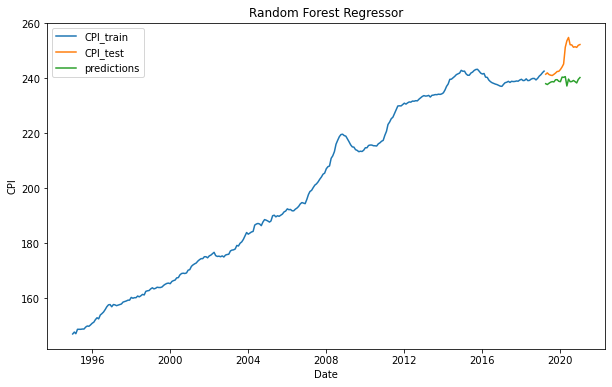

In [123]:
figl,ax=plt.subplots(figsize=(10,6))
ax.plot(y.iloc[:-22],label="CPI_train")
ax.plot(y.iloc[-22:],label="CPI_test")
ax.plot(y_graph,label="predictions")

plt.legend(loc="upper left")
plt.title("Random Forest Regressor")
plt.ylabel("CPI")
plt.xlabel("Date")
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  85.81449739348153
RMSE:  9.26361146602563


## Second model: Linear Regression model

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [36]:
# Define our features (X) and outcome(y)
X=cpi_gas_df.drop(["CPI"],1)
y=cpi_gas_df["CPI"]

C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [37]:
# Split the training and test set
X_train = X.iloc[:-22].values
y_train=y.iloc[:-22].values
X_test = X.iloc[-22:].values
y_test=y.iloc[-22:].values

In [38]:
# Create StandardScaler instance and Fit the scaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [39]:
# Scale the data
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [40]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
y_pre_LR=linreg.predict(X_test_scaled)
y_pre_LR

array([270.66137835, 274.25855853, 259.2695272 , 252.76458311,
       261.94330551, 261.67126825, 304.43461923, 284.79198885,
       254.81494935, 242.41299153, 255.76782866, 259.40268689,
       236.66257263, 241.16189401, 245.373491  , 238.79700284,
       230.76615353, 233.75473846, 241.81681629, 246.36373786,
       247.69540564, 257.0298217 ])

In [130]:
y_graph_LR=y.iloc[-22:]
y_graph_LR["y_pred"]=y_pre_LR

C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [131]:
y_graph_LR=y_graph_LR.drop("CPI",axis=1)

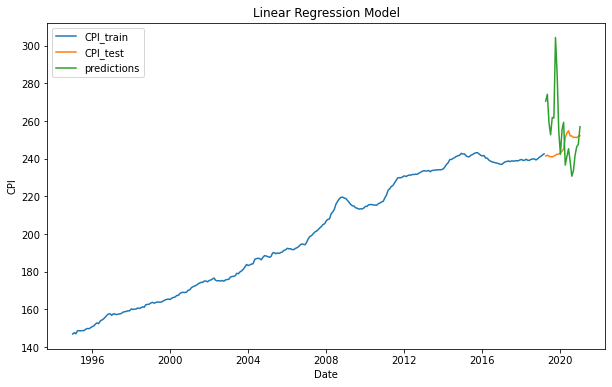

In [133]:
figl,ax=plt.subplots(figsize=(10,6))
ax.plot(y.iloc[:-22],label="CPI_train")
ax.plot(y.iloc[-22:],label="CPI_test")
ax.plot(y_graph_LR,label="predictions")

plt.legend(loc="upper left")
plt.title("Linear Regression Model")
plt.ylabel("CPI")
plt.xlabel("Date")
plt.show()

In [124]:
score = linreg.score(X_train_scaled, y_train)
print("R-squared:", score) 

R-squared: 0.9746453058668233


In [121]:
mse = mean_squared_error(y_test, y_pre_LR)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  497.7856273713054
RMSE:  22.311109953816853


## Sub Linear Regression Model: OLS method

In [125]:
import statsmodels.api as sm

In [126]:
X_train_scaled = sm.add_constant(X_train_scaled)
model_OLS = sm.OLS(y_train, X_train_scaled).fit()

In [127]:
y_pred_OLS=model_OLS.predict(X_test_scaled)
y_pred_OLS

ValueError: shapes (22,13) and (14,) not aligned: 13 (dim 1) != 14 (dim 0)

In [128]:
# Score the model
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     819.1
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          1.88e-212
Time:                        19:01:20   Log-Likelihood:                -883.84
No. Observations:                 291   AIC:                             1796.
Df Residuals:                     277   BIC:                             1847.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.9798      0.303    659.777      0.0

In [129]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  85.81449739348153
RMSE:  9.26361146602563


## Third model: Brown Simple Exponential Smoothing Method

In [44]:
import statsmodels.tsa.holtwinters as ets

In [45]:
cpi_df.head()

,Date,CPI
0,1995-01-01,147.0
1,1995-02-01,147.7
2,1995-03-01,147.1
3,1995-04-01,148.7
4,1995-05-01,148.7


In [49]:
cpi_df=cpi_df.set_index("Date")

In [50]:
CPI_train=cpi_df[:-22]
CPI_test =cpi_df[-22:]

In [51]:
CPI_train

,CPI
Date,
1995-01-01,147.000
1995-02-01,147.700
1995-03-01,147.100
1995-04-01,148.700
1995-05-01,148.700
...,...
2018-11-01,239.990
2018-12-01,240.786
2019-01-01,241.320


In [52]:
model=ets.ExponentialSmoothing(CPI_train,trend="additive",damped=False, seasonal=None).fit()


C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  """Entry point for launching an IPython kernel.
C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model=ets.ExponentialSmoothing(CPI_train,trend="additive",damped=False, seasonal=None).fit()

In [ ]:
predictions=model.forecast(steps=len(CPI_test))


In [53]:
predictions

2019-04-01    243.100247
2019-05-01    243.597493
2019-06-01    244.094740
2019-07-01    244.591986
2019-08-01    245.089233
2019-09-01    245.586480
2019-10-01    246.083726
2019-11-01    246.580973
2019-12-01    247.078219
2020-01-01    247.575466
2020-02-01    248.072713
2020-03-01    248.569959
2020-04-01    249.067206
2020-05-01    249.564453
2020-06-01    250.061699
2020-07-01    250.558946
2020-08-01    251.056192
2020-09-01    251.553439
2020-10-01    252.050686
2020-11-01    252.547932
2020-12-01    253.045179
2021-01-01    253.542425
Freq: MS, dtype: float64

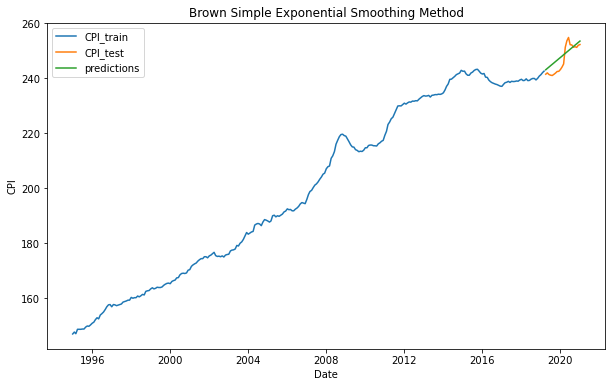

In [54]:
figl,ax=plt.subplots(figsize=(10,6))
ax.plot(CPI_train,label="CPI_train")
ax.plot(CPI_test,label="CPI_test")
ax.plot(predictions,label="predictions")

plt.legend(loc="upper left")
plt.title("Brown Simple Exponential Smoothing Method")
plt.ylabel("CPI")
plt.xlabel("Date")
plt.show()

In [55]:
mse = mean_squared_error(CPI_test, predictions)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  9.686378243459739
RMSE:  3.1122946909731635


## Triple Exponential smoothing 
Almost exactly like Brown Exponential smoothing. Just for testing purpose.  


In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [57]:
model_t = ExponentialSmoothing(CPI_train,trend="additive",seasonal="mul",seasonal_periods=12).fit()

C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


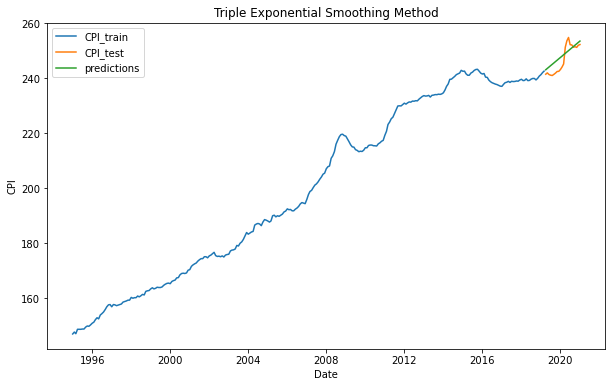

In [58]:
figl,ax=plt.subplots(figsize=(10,6))
ax.plot(CPI_train,label="CPI_train")
ax.plot(CPI_test,label="CPI_test")
ax.plot(model.forecast(22),label="predictions")

plt.legend(loc="upper left")
plt.title("Triple Exponential Smoothing Method")
plt.ylabel("CPI")
plt.xlabel("Date")
plt.show()

In [59]:
predictions_triple=model_t.forecast(22)

In [60]:
mse = mean_squared_error(CPI_test, predictions_triple)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  9.914741564956175
RMSE:  3.1487682615518366


## Apply Exponential Smoothing Model to gas type all_grades_all_formulation 

In [135]:
# Pull out all_grades_all_formulation data from the main dataset
AGAF_df=cpi_gas_df[["all_grades_all_formulation"]]
AGAF_df.head(5)

,all_grades_all_formulation
Date,
1995-01-01,1.127
1995-02-01,1.124
1995-03-01,1.123
1995-04-01,1.133
1995-05-01,1.194


In [136]:
AGAF_train=AGAF_df[:-22]
AGAF_test =AGAF_df[-22:]

In [162]:
# Build and train the model
model_AGAF=ExponentialSmoothing(AGAF_train,trend="additive",damped=False, seasonal=None).fit()

C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  
C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [163]:
#predictions_AGAF=model_AGAF.forecast(steps=len(CPI_test))

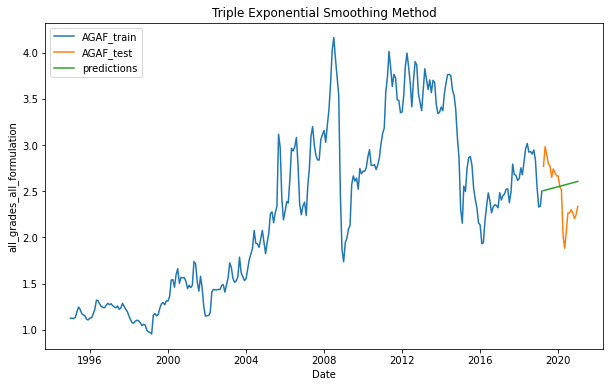

In [166]:
# Set up the prediction from 2019-04-01 to 2022-12-01 (45 months)
figl,ax=plt.subplots(figsize=(10,6))
ax.plot(AGAF_train,label="AGAF_train")
ax.plot(AGAF_test,label="AGAF_test")
ax.plot(model_AGAF.forecast(22),label="predictions")

plt.legend(loc="upper left")
plt.title("Triple Exponential Smoothing Method")
plt.ylabel("all_grades_all_formulation")
plt.xlabel("Date")
plt.show()

In [165]:
mse = mean_squared_error(AGAF_test, model_AGAF.forecast(22))
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  0.11134788566388173
RMSE:  0.33368830615393424


In [150]:
prediction_AGAF=model_AGAF.forecast(45)
prediction_AGAF


2019-04-01    2.506742
2019-05-01    2.511484
2019-06-01    2.516225
2019-07-01    2.520967
2019-08-01    2.525709
2019-09-01    2.530451
2019-10-01    2.535192
2019-11-01    2.539934
2019-12-01    2.544676
2020-01-01    2.549418
2020-02-01    2.554160
2020-03-01    2.558901
2020-04-01    2.563643
2020-05-01    2.568385
2020-06-01    2.573127
2020-07-01    2.577868
2020-08-01    2.582610
2020-09-01    2.587352
2020-10-01    2.592094
2020-11-01    2.596836
2020-12-01    2.601577
2021-01-01    2.606319
2021-02-01    2.611061
2021-03-01    2.615803
2021-04-01    2.620544
2021-05-01    2.625286
2021-06-01    2.630028
2021-07-01    2.634770
2021-08-01    2.639511
2021-09-01    2.644253
2021-10-01    2.648995
2021-11-01    2.653737
2021-12-01    2.658479
2022-01-01    2.663220
2022-02-01    2.667962
2022-03-01    2.672704
2022-04-01    2.677446
2022-05-01    2.682187
2022-06-01    2.686929
2022-07-01    2.691671
2022-08-01    2.696413
2022-09-01    2.701155
2022-10-01    2.705896
2022-11-01 

In [154]:
# Create datafrome
prediction_AGAF_df= pd.DataFrame(prediction_AGAF)

In [155]:
prediction_AGAF_df

,0
2019-04-01,2.506742
2019-05-01,2.511484
2019-06-01,2.516225
2019-07-01,2.520967
2019-08-01,2.525709
2019-09-01,2.530451
2019-10-01,2.535192
2019-11-01,2.539934
2019-12-01,2.544676
2020-01-01,2.549418


In [157]:
# Export to csv file
prediction_AGAF_df.to_csv("all_grades_all_formulation prediction.csv")